## CPSC 8430 Fall 2024 HW_1_3b

#### 1. Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#### 2. Define DNN with different sizes

In [2]:
class DNN(nn.Module):
    def __init__(self, hidden_size1, hidden_size2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, hidden_size1)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_size2, 10)  # Output layer for 10 MNIST classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input (28x28 images)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### 3. Utility functions

In [3]:
# Model training function
def train_model(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    running_loss = 0.0
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    return running_loss / len(train_loader)

# Model evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total
    return avg_loss, accuracy

#### 4. Load and prepare dataset

In [4]:
# Prepare the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data_MNIST_1_3', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data_MNIST_1_3', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

#### 5. Model training

In [5]:
# List of different hidden layer sizes for 10 models
hidden_layer_sizes = [(64, 32), (128, 64), (256, 128), (512, 256), (1024, 512),
                      (32, 16), (512, 128), (1024, 256), (2048, 512), (4096, 1024)]

models = [DNN(h1, h2) for h1, h2 in hidden_layer_sizes]
parameter_counts = []
train_losses = []
test_losses = []
test_accuracies = []

# Training loop
for i, model in enumerate(models):
    print(f"Training Model {i+1} with hidden sizes {hidden_layer_sizes[i]}")
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    # Count the number of parameters
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    parameter_counts.append(param_count)
    
    # Train the model and evaluate
    train_loss = train_model(model, train_loader, optimizer, criterion, epochs=5)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f"Model {i+1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}, Parameters = {param_count}")

Training Model 1 with hidden sizes (64, 32)
Model 1: Train Loss = 0.7349, Test Loss = 0.0869, Parameters = 52650
Training Model 2 with hidden sizes (128, 64)
Model 2: Train Loss = 0.5733, Test Loss = 0.0755, Parameters = 109386
Training Model 3 with hidden sizes (256, 128)
Model 3: Train Loss = 0.4853, Test Loss = 0.0935, Parameters = 235146
Training Model 4 with hidden sizes (512, 256)
Model 4: Train Loss = 0.4356, Test Loss = 0.0726, Parameters = 535818
Training Model 5 with hidden sizes (1024, 512)
Model 5: Train Loss = 0.4247, Test Loss = 0.0826, Parameters = 1333770
Training Model 6 with hidden sizes (32, 16)
Model 6: Train Loss = 1.0365, Test Loss = 0.1375, Parameters = 25818
Training Model 7 with hidden sizes (512, 128)
Model 7: Train Loss = 0.4400, Test Loss = 0.0683, Parameters = 468874
Training Model 8 with hidden sizes (1024, 256)
Model 8: Train Loss = 0.4250, Test Loss = 0.0706, Parameters = 1068810
Training Model 9 with hidden sizes (2048, 512)
Model 9: Train Loss = 0.4221

#### 6. Plot

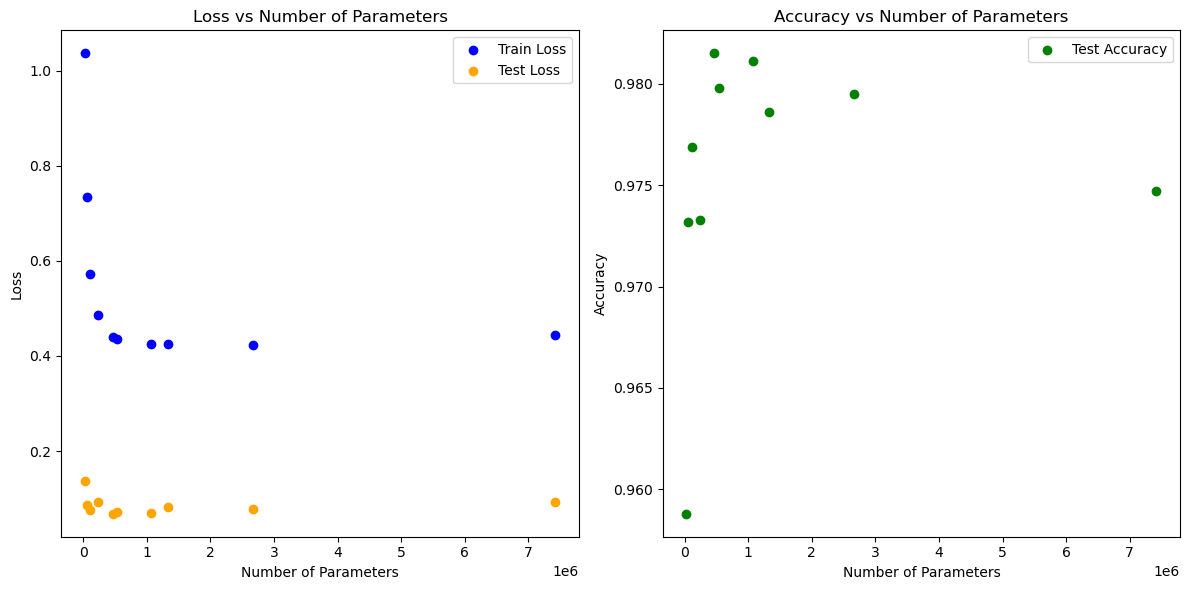

In [6]:
# Plot Loss vs Number of Parameters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(parameter_counts, train_losses, label='Train Loss', color='blue')
plt.scatter(parameter_counts, test_losses, label='Test Loss', color='orange')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Loss vs Number of Parameters')
plt.legend()

# Plot Accuracy vs Number of Parameters
plt.subplot(1, 2, 2)
plt.scatter(parameter_counts, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Parameters')
plt.legend()

plt.tight_layout()
plt.show()